# Credit Card Fraud Detection- Using Classification Machine Learning Models

This project utilizes Decision Tree and Support Vector Machine (SVM) models to detect fraudulent credit card transactions.
 Using a real dataset from European cardholders in September 2013, the models are trained to classify transactions as legitimate or fraudulent. 
 * The goal is to improve fraud detection accuracy through classification-based machine learning techniques.

About Dataset :

* V1-V28: Anonymized features representing various transaction attributes (e.g., location, etc.)
* Amount: The transaction amount
* Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize, StandardScaler
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score


In [61]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
df=pd.read_csv(url)
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


In [62]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Analysis

In [64]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


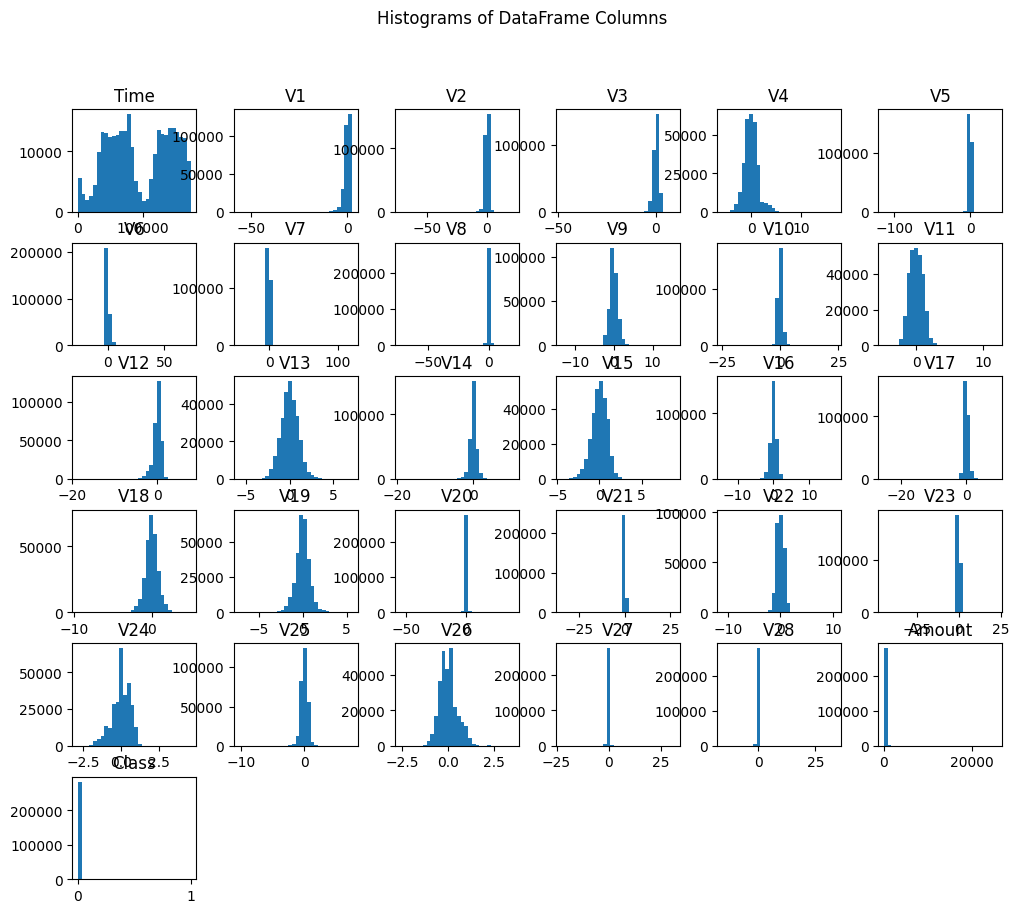

In [65]:
df.hist(bins=30,figsize=(12,10), grid=False )
plt.suptitle('Histograms of DataFrame Columns')
plt.show()

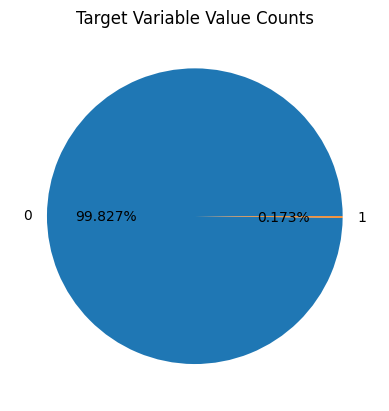

Class
0    284315
1       492
Name: count, dtype: int64


In [66]:
labels = df.Class.unique()

sizes = df.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()
print(df.Class.value_counts())

* Only about 0.173% of transactions are fraudulent, showing significant class imbalance.

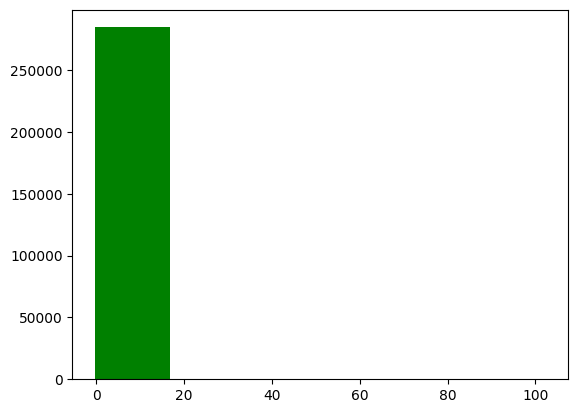

Minimum amount value is  -0.35322939296682354
Maximum amount value is  102.36224270928423
90% of the transactions have an amount less or equal than  0.4583821044025814


In [82]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

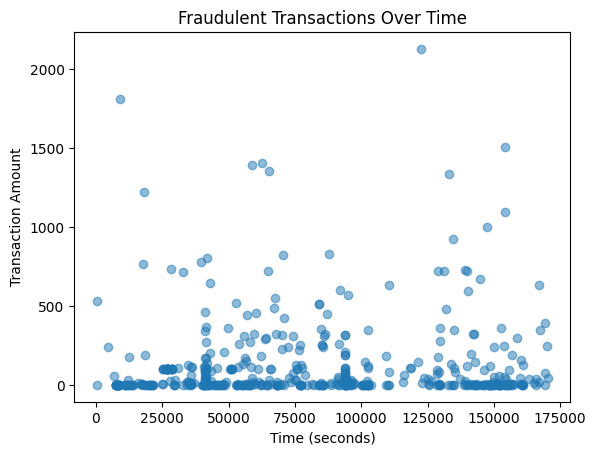

In [68]:
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

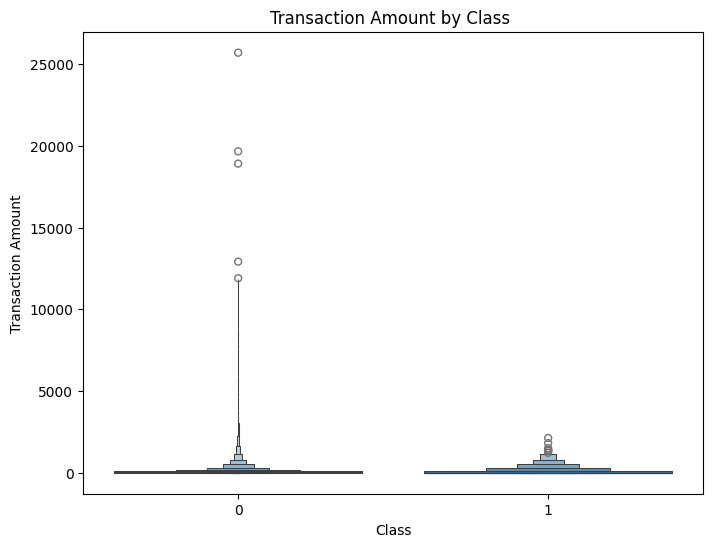

In [69]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

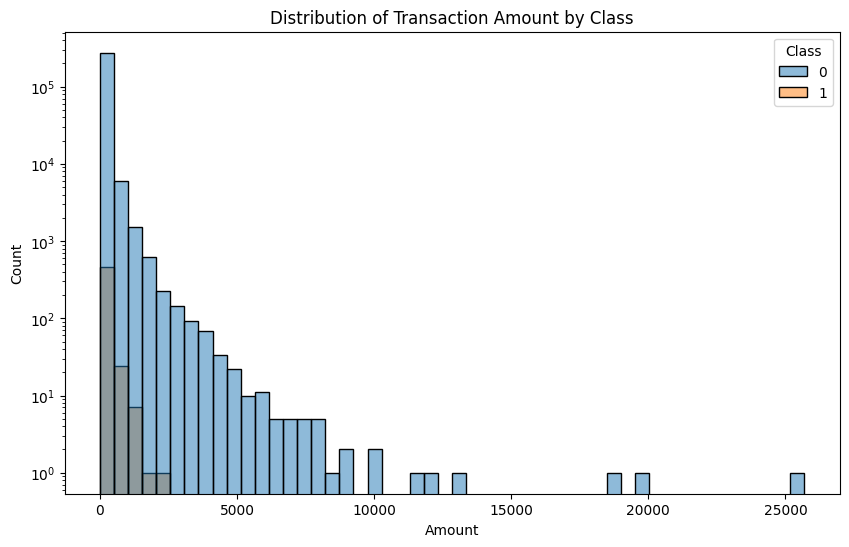

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50)
plt.title('Distribution of Transaction Amount by Class')
plt.yscale('log')
plt.show()

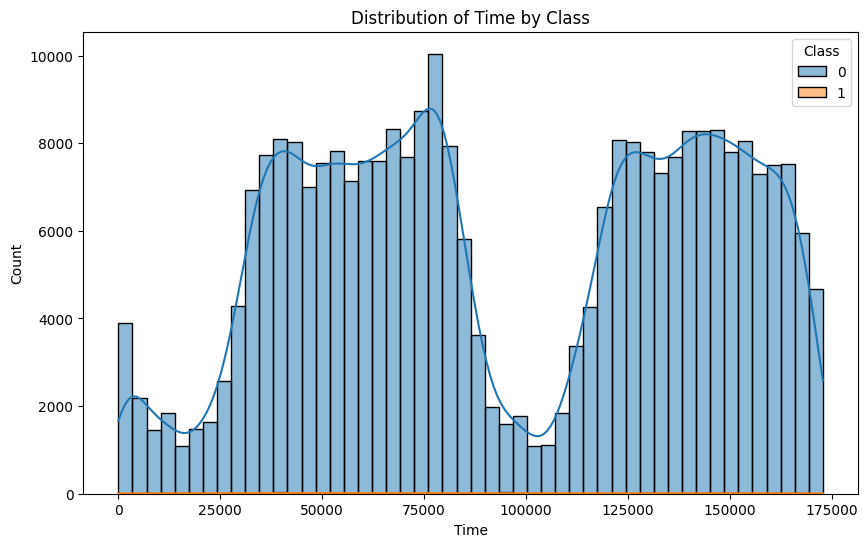

In [71]:
# Time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=50, kde=True)
plt.title('Distribution of Time by Class')
plt.show()

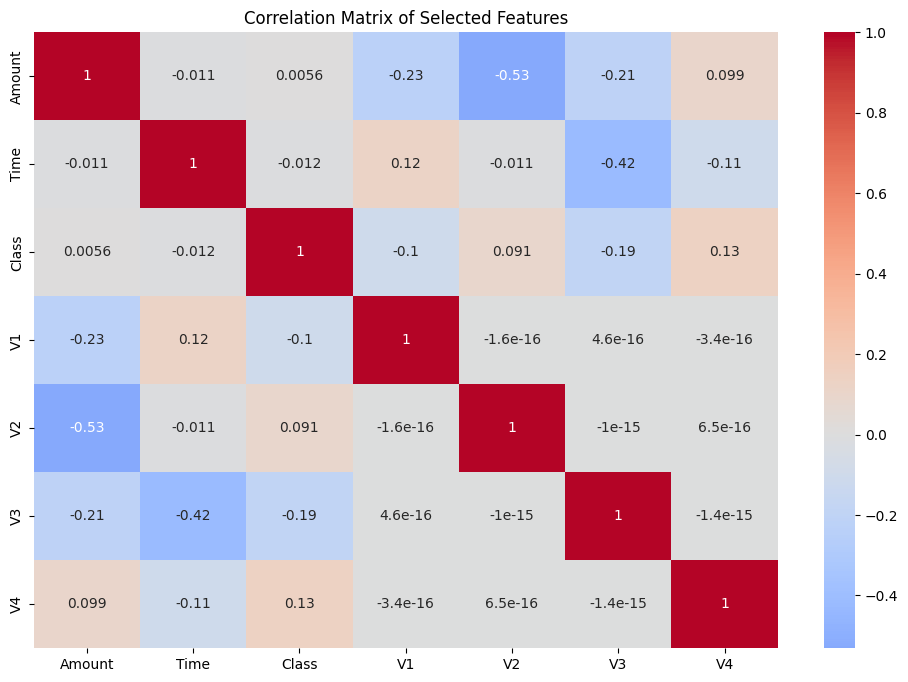

In [83]:
# Correlation matrix for important features
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Amount', 'Time', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# data preprocessing

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [74]:
# data preprocessing such as scaling/normalization is typically useful for 
# linear models to accelerate the training convergence

# standardize features by removing the mean and scaling to unit variance
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


# Dataset Train/Test Split


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (199364, 29) (199364,)
Test set: (85443, 29) (85443,)


# Decision Tree Classifier model

In [76]:
model_DTc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model_DTc.fit(X_train, y_train)
yhat = model_DTc.predict(X_test)
new_accuracy = model_DTc.score(X_test, y_test)
print("DecisionTrees's Accuracy: ", new_accuracy)



DecisionTrees's Accuracy:  0.9989232587807076


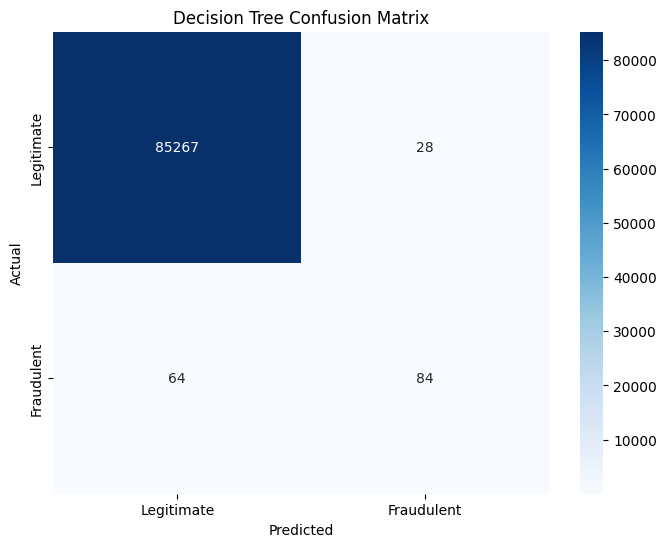

In [88]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, yhat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

 # Support Vector Machine model

In [77]:
#svm model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = svm_model.score(X_test, y_test)
print("SVM Accuracy: {0:.5f}".format(accuracy_svm))


SVM Accuracy: 0.99924


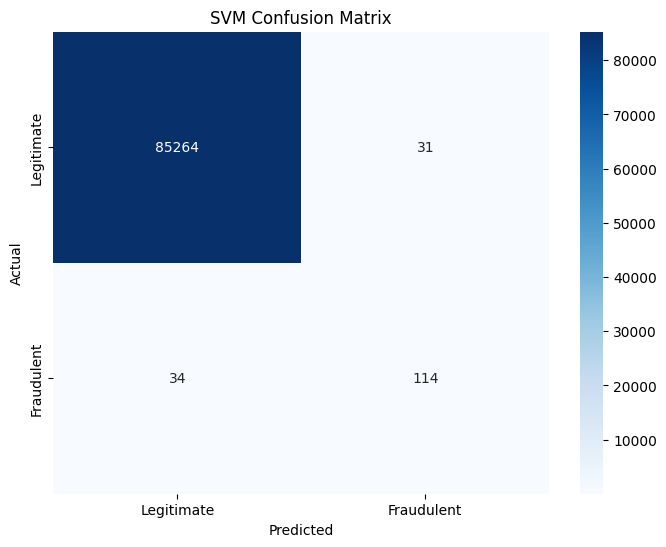

In [90]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# RandomForestClassifier model

In [78]:
# Create a new RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy_rf = rf_model.score(X_test, y_test)
print("RandomForestClassifier Accuracy: {0:.5f}".format(accuracy_rf))

RandomForestClassifier Accuracy: 0.99936


# LogisticRegression model

In [79]:
from sklearn.linear_model import LogisticRegression

# Create a new LogisticRegression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the accuracy
accuracy_logreg = logreg_model.score(X_test, y_test)
print("LogisticRegression Accuracy: {0:.5f}".format(accuracy_logreg))

LogisticRegression Accuracy: 0.99879


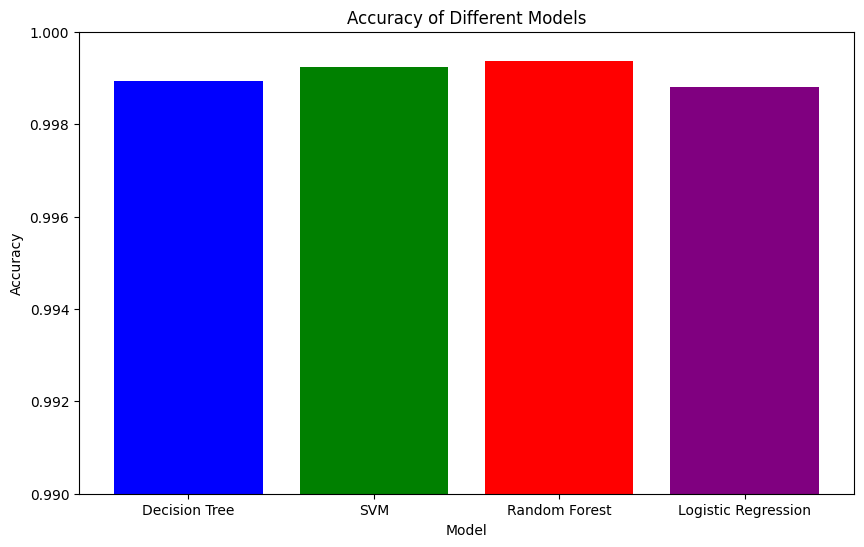

In [80]:
# Model names and their accuracies
model_names = ['Decision Tree', 'SVM', 'Random Forest', 'Logistic Regression']
accuracies = [new_accuracy, accuracy_svm, accuracy_rf, accuracy_logreg]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.99, 1.0)  # Adjust the y-axis to better visualize the differences
plt.show()

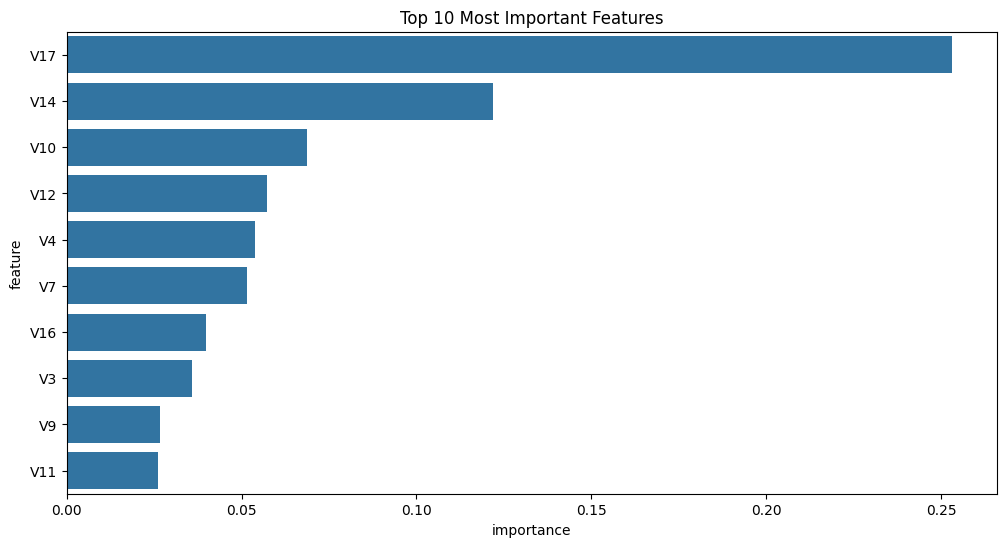

In [85]:
feature_importance = pd.DataFrame({
    'feature': df.columns[1:30],  # Exclude 'Time' and 'Class' columns
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [81]:
from sklearn.metrics import classification_report

# Generate classification reports for each model
report_dt = classification_report(y_test, yhat, target_names=['Legitimate', 'Fraudulent'])
report_svm = classification_report(y_test, y_pred_svm, target_names=['Legitimate', 'Fraudulent'])
report_rf = classification_report(y_test, y_pred_rf, target_names=['Legitimate', 'Fraudulent'])
report_logreg = classification_report(y_test, y_pred_logreg, target_names=['Legitimate', 'Fraudulent'])

# Print the reports
print("Decision Tree Classifier Report:\n", report_dt)
print("SVM Classifier Report:\n", report_svm)
print("Random Forest Classifier Report:\n", report_rf)
print("Logistic Regression Classifier Report:\n", report_logreg)

Decision Tree Classifier Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
  Fraudulent       0.75      0.57      0.65       148

    accuracy                           1.00     85443
   macro avg       0.87      0.78      0.82     85443
weighted avg       1.00      1.00      1.00     85443

SVM Classifier Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
  Fraudulent       0.79      0.77      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest Classifier Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     85295
  Fraudulent       0.94      0.67      0.78       148

    accuracy                           1.00     85443
   macro avg       0.97      0.83   